In [102]:
import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm import tqdm

In [103]:
price_dataset = datasets.PriceDataset()
[tr_x, tr_y, val_x, val_y] = price_dataset.getDataset()

In [104]:
target = pd.concat((tr_y, val_y))
data = pd.concat((tr_x, val_x))

In [105]:
total_data = pd.concat((data, np.log1p(target)), axis=1)
del total_data['id']
del total_data['date']
total_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,2.50,2290,6302,2.0,0,0,3,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500,12.994532
1,5,3.25,4260,7861,2.0,0,0,3,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528,13.809493
2,3,1.75,2000,7111,1.0,0,0,4,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000,12.964542
3,3,1.75,1270,4800,1.0,0,0,3,7,1270,0,1952,2014,98126,47.5362,-122.376,1220,4800,12.936036
4,3,1.75,2100,8298,1.0,0,0,4,7,1230,870,1952,0,98166,47.4601,-122.360,1700,10830,12.721889


In [106]:
total_data_origin = total_data.copy()

In [107]:
def remove_outlier(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [114]:
total_norm = total_data[['waterfront', 'view' , 'condition', 'yr_built' , 'yr_renovated' , 'zipcode', 'price']]

In [115]:
corr_order = total_norm.corr().loc[:'zipcode', 'price'].abs().sort_values(ascending=False)
corr_order

view            0.349592
waterfront      0.175460
yr_renovated    0.106325
yr_built        0.080498
zipcode         0.039979
condition       0.038910
Name: price, dtype: float64

In [47]:
corr_order = total_data.corr().loc[:'sqft_lot15', 'price'].abs().sort_values(ascending=False)
corr_order

grade            0.705994
sqft_living      0.695039
sqft_living15    0.622117
sqft_above       0.600589
bathrooms        0.551256
lat              0.448070
view             0.349592
bedrooms         0.343723
sqft_basement    0.318810
floors           0.308531
waterfront       0.175460
yr_renovated     0.106325
sqft_lot         0.093741
sqft_lot15       0.086676
yr_built         0.080498
long             0.051356
zipcode          0.039979
condition        0.038910
Name: price, dtype: float64

In [48]:
colbin = ['bedrooms','bathrooms','floors','view','condition','yr_built','yr_renovated', 'zipcode', 'grade','waterfront']
colnorm = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']

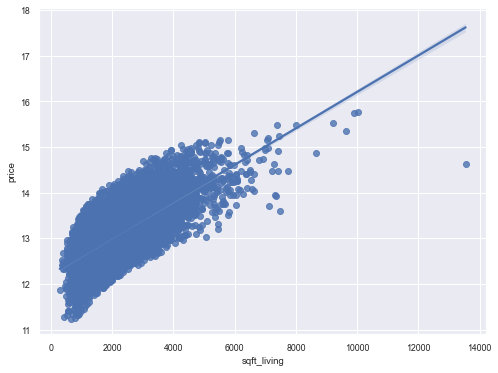

In [116]:
data = pd.concat([total_data['price'], total_data['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

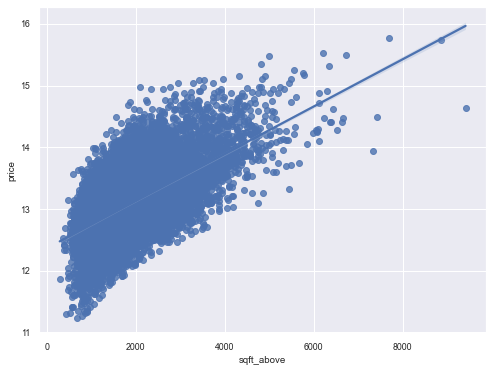

In [120]:
data = pd.concat([total_data['price'], total_data['sqft_above']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_above', y="price", data=data)

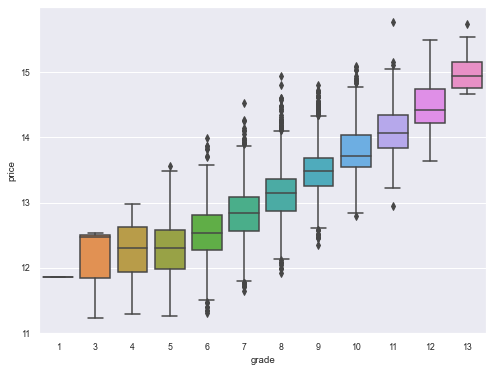

In [121]:
data = pd.concat([total_data['price'], total_data['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [ ]:
data = pd.concat([total_data['price'], total_data['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

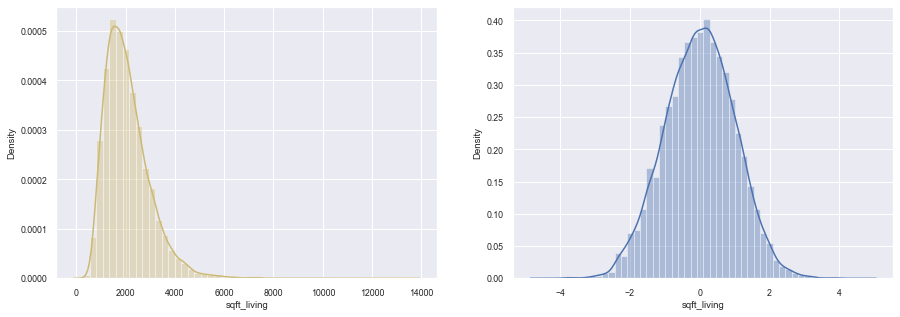

In [49]:
#sqft_living
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_living'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['sqft_living'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

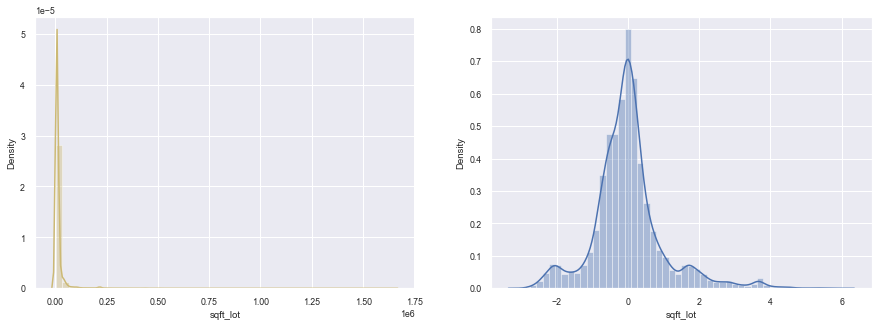

In [51]:
# sqft_lot
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_lot'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['sqft_lot'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

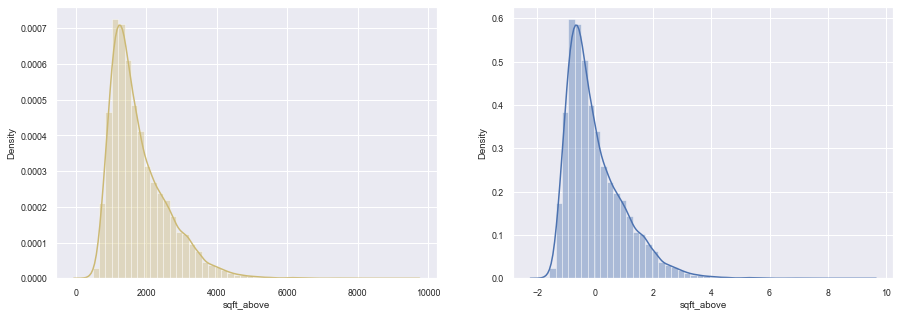

In [52]:
#sqft_above'
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_above'], color='y' ,ax = ax[0])
sns.distplot(zscore(total_data['sqft_above']), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

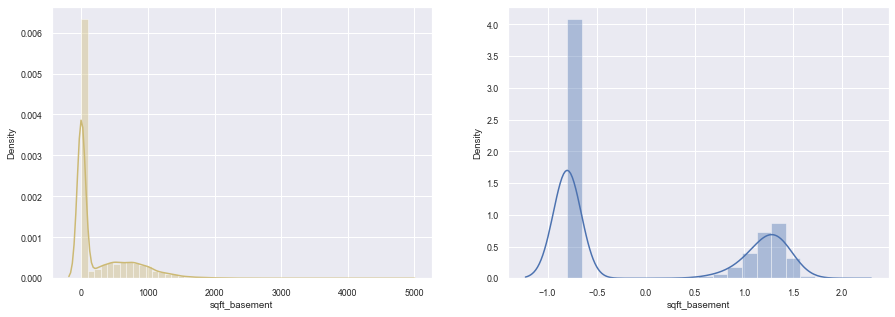

In [53]:
##sqft_basement
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_basement'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['sqft_basement'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

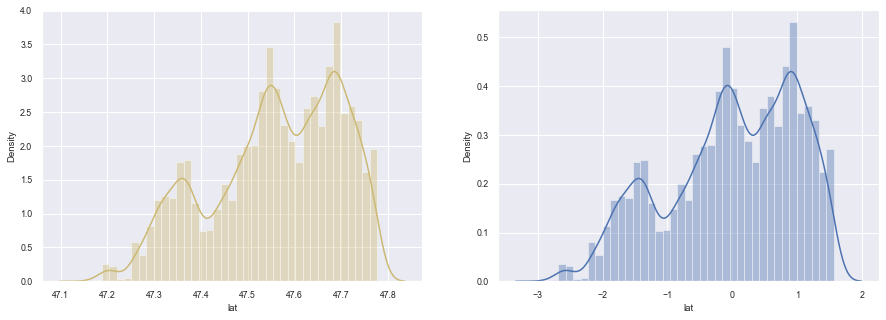

In [54]:
##lat
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['lat'], color='y' ,ax = ax[0])
sns.distplot(zscore(total_data['lat']), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='long', ylabel='Density'>

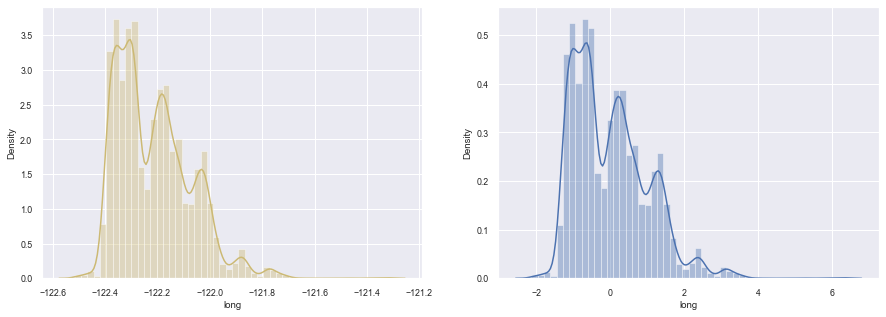

In [55]:
##long
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['long'], color='y' ,ax = ax[0])
sns.distplot(zscore(total_data['long']), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

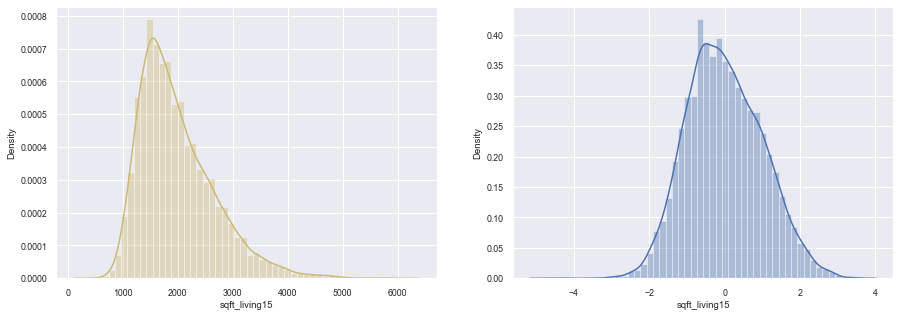

In [56]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_living15'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['sqft_living15'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

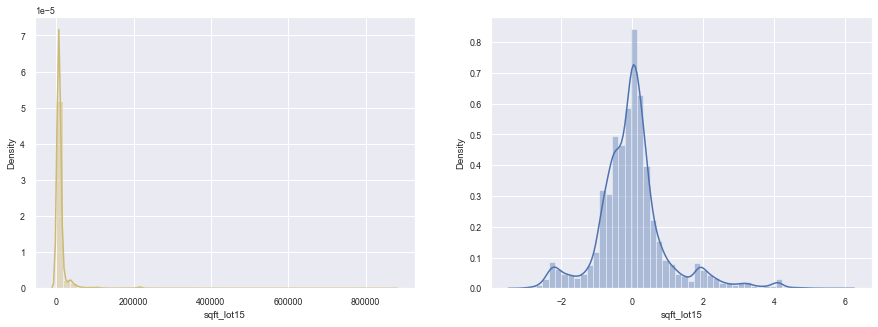

In [57]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['sqft_lot15'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['sqft_lot15'])), color='b' ,ax = ax[1])

In [19]:
total_data['yr_built'].describe()

count    17291.000000
mean      1971.107570
std         29.288035
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [20]:
update_built =total_data['yr_built'] < total_data['yr_renovated']
update_built

0       False
1       False
2       False
3        True
4       False
        ...  
4318    False
4319    False
4320    False
4321    False
4322    False
Length: 17291, dtype: bool

In [21]:
total_data['yr_built'][update_built] = total_data['yr_renovated'][update_built]

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [22]:
total_data['yr_built'].describe()

count    17291.000000
mean      1973.502227
std         28.697161
min       1900.000000
25%       1954.000000
50%       1977.000000
75%       1999.000000
max       2015.000000
Name: yr_built, dtype: float64

<AxesSubplot:>

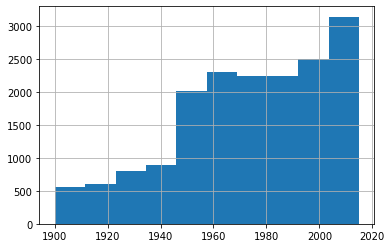

In [23]:
total_data['yr_built'].hist()

In [24]:
bins = [1900, 1954, 1977, 1999, 2015]
ctg = pd.cut(total_data['yr_built'], bins=bins)
ctg.value_counts().sort_index()

(1900, 1954]    4331
(1954, 1977]    4261
(1977, 1999]    4477
(1999, 2015]    4167
Name: yr_built, dtype: int64

In [25]:
total_data['bin_built'] = pd.cut(total_data['yr_built'], bins=20)
total_data['bin_built'].value_counts().sort_index()

(1899.885, 1905.75]     206
(1905.75, 1911.5]       354
(1911.5, 1917.25]       265
(1917.25, 1923.0]       393
(1923.0, 1928.75]       502
(1928.75, 1934.5]       248
(1934.5, 1940.25]       306
(1940.25, 1946.0]       685
(1946.0, 1951.75]       849
(1951.75, 1957.5]      1071
(1957.5, 1963.25]      1235
(1963.25, 1969.0]      1299
(1969.0, 1974.75]       558
(1974.75, 1980.5]      1449
(1980.5, 1986.25]      1030
(1986.25, 1992.0]      1385
(1992.0, 1997.75]       855
(1997.75, 2003.5]      1465
(2003.5, 2009.25]      1998
(2009.25, 2015.0]      1138
Name: bin_built, dtype: int64

##전처리된 변수들끼리의 상관관계

In [26]:
log_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
z_columns = ['lat', 'long']
colnorm = ['sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long'] #, 'sqft_lot15', 'sqft_living15','sqft_above'

In [27]:
for c in log_columns:
    total_data[c] = zscore(np.log1p(total_data[c].values))
for c in z_columns:
    total_data[c] = zscore(total_data[c].values)

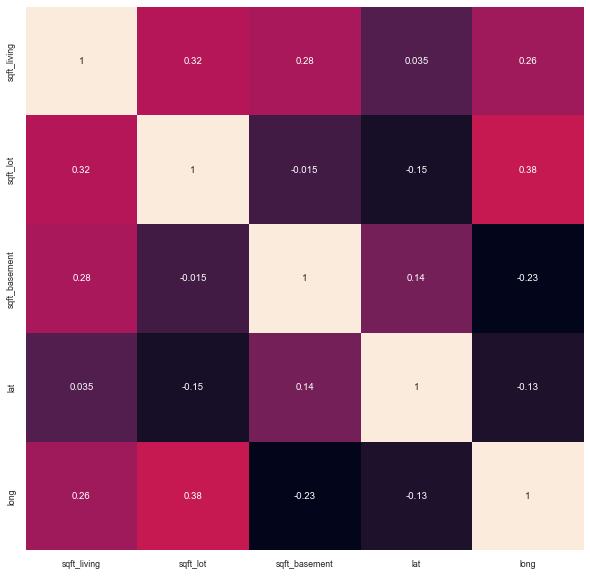

In [28]:
#상관 관계 행렬
total_data_corr=total_data[colnorm].corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(total_data_corr, annot=True, cbar=False)
plt.show()

In [29]:
total_data_corr['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_lot         0.323681
sqft_basement    0.282255
long             0.256801
lat              0.034643
Name: sqft_living, dtype: float64

In [30]:
corr_order = total_data.corr().loc[colnorm, 'price'].abs().sort_values(ascending=False)
corr_order

sqft_living      0.674693
lat              0.448070
sqft_basement    0.238699
sqft_lot         0.137443
long             0.051356
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

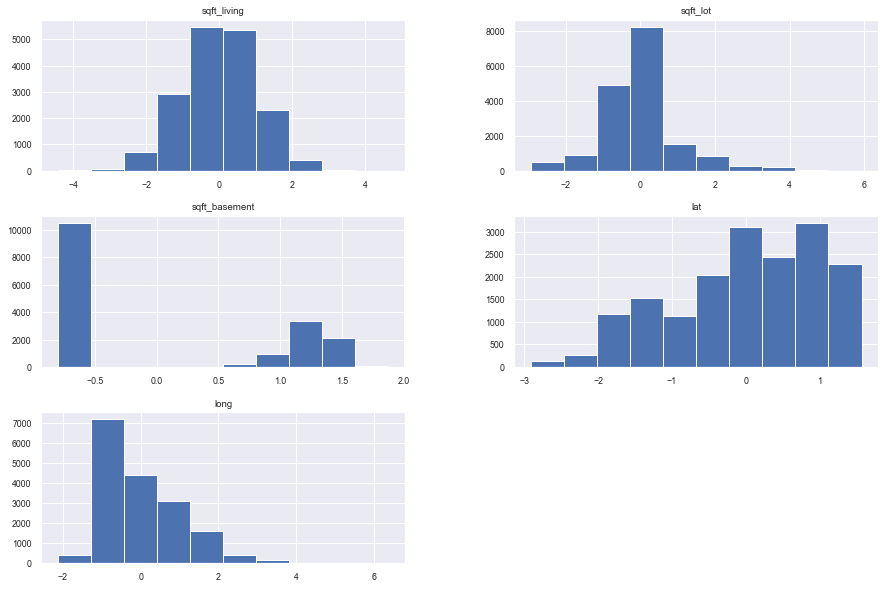

In [34]:
total_data[colnorm].hist(figsize=(15,10))

In [77]:
location = pd.concat((total_data_origin['lat'], total_data_origin['long']), axis=1)

In [86]:
kmeans = KMeans(n_clusters=100).fit(location)

In [91]:
location['cluster'] = pd.DataFrame(kmeans.labels_)

In [92]:
location

,lat,long,cluster
0,47.4350,-122.107,27
1,47.6110,-121.992,95
2,47.7676,-122.373,53
3,47.5362,-122.376,62
4,47.4601,-122.360,90
...,...,...,...
4318,47.4655,-122.174,14
4319,47.6233,-122.046,62
4320,47.6571,-122.133,62
4321,47.5807,-122.196,63


array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'waterfront'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

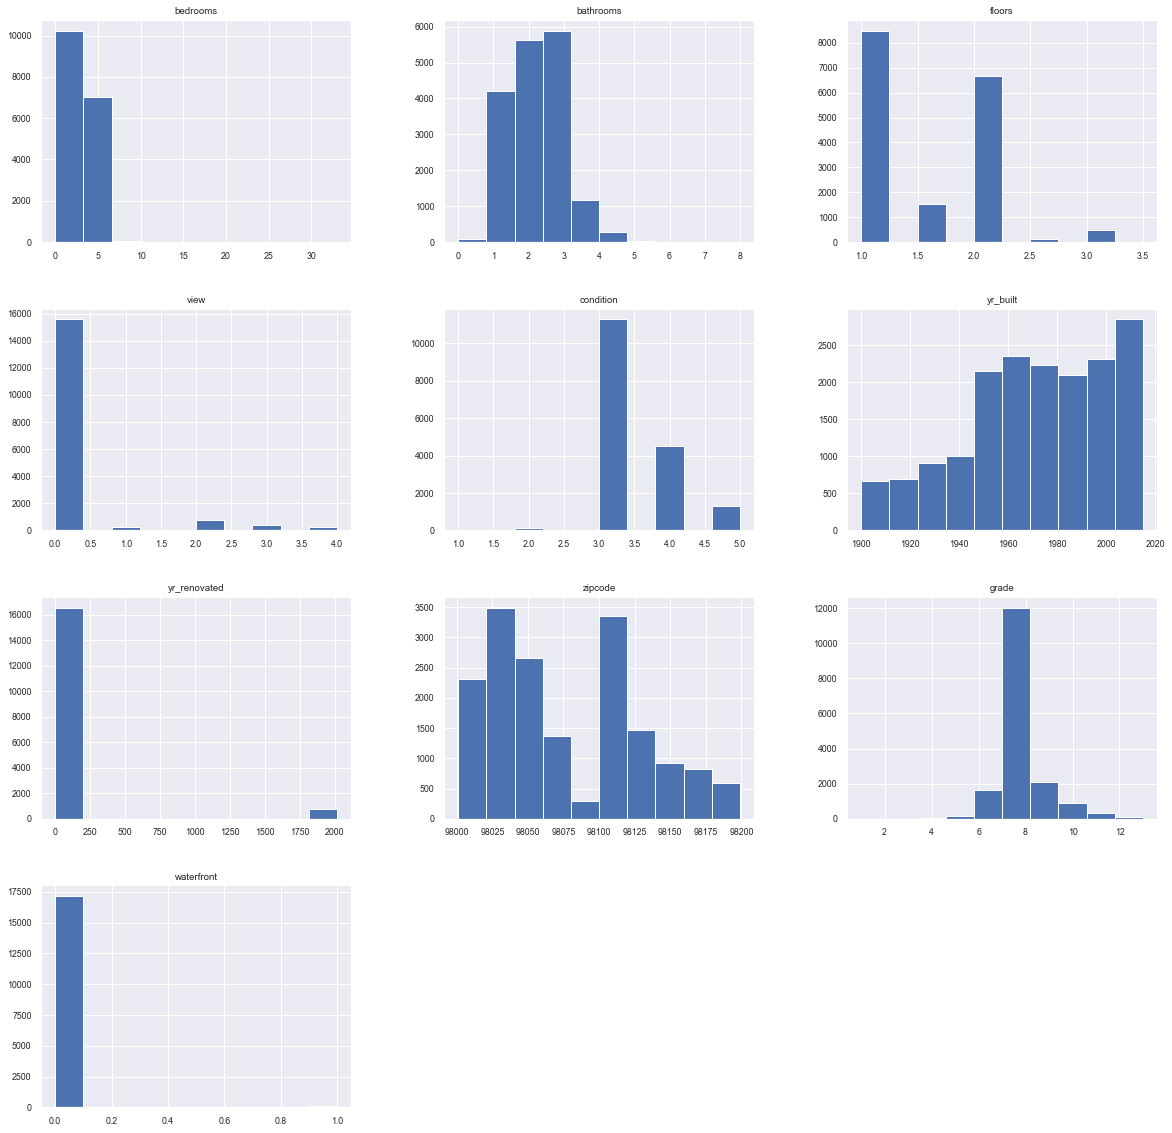

In [96]:
total_data[colbin].hist(figsize=(20, 20))

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

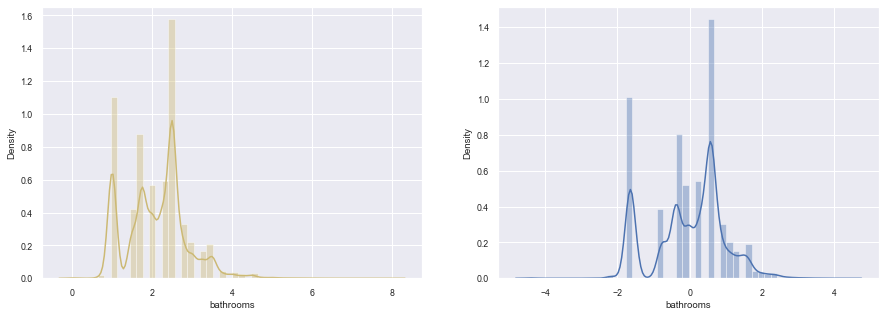

In [101]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['bathrooms'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['bathrooms'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

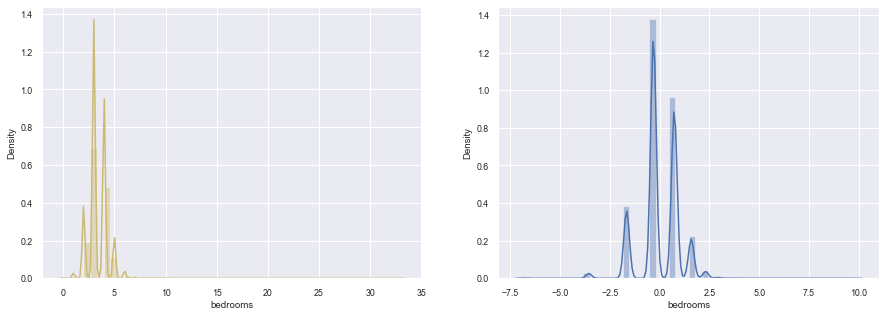

In [98]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['bedrooms'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['bedrooms'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grade', ylabel='Density'>

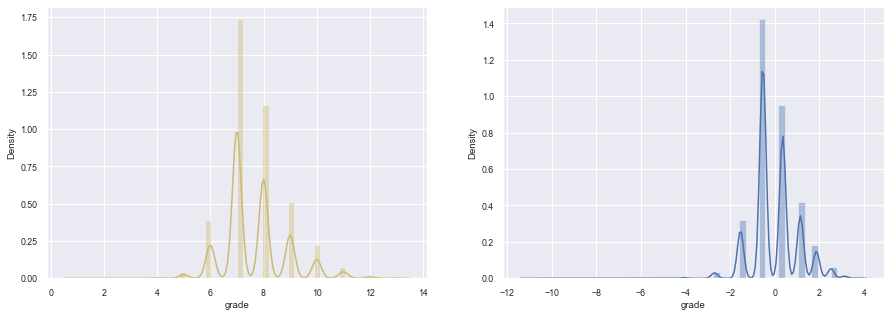

In [99]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['grade'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['grade'])), color='b' ,ax = ax[1])

C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wonsang\anaconda3\envs\CA1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yr_built', ylabel='Density'>

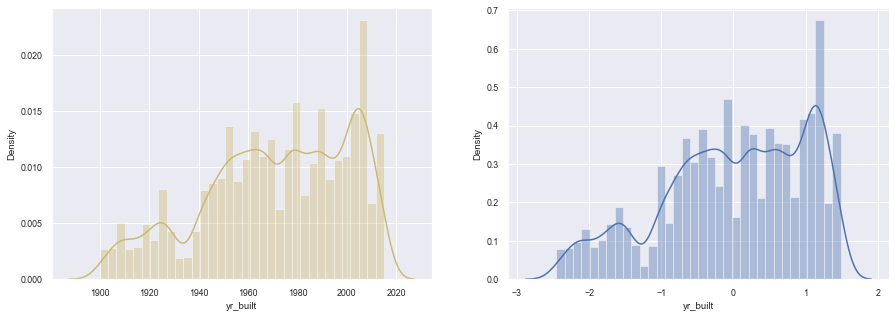

In [100]:
##sqft_living15
fig, ax = plt.subplots(1, 2 , figsize = (15,5))
sns.distplot(total_data['yr_built'], color='y' ,ax = ax[0])
sns.distplot(zscore(np.log1p(total_data['yr_built'])), color='b' ,ax = ax[1])